  ## Importation des bibliothèques et chargement des donées
*****


__Description__
 : Import des bibliothèques nécessaires pour manipuler les données et analyser les tweets.

In [154]:
import pandas as pd
import numpy as np
import re
#import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Chargement des données



__Description__
: Chargement des données des tweets depuis un fichier CSV.

In [157]:
data = pd.read_csv(r"C:\Users\ichig\Downloads\REF TWEETS.csv")

## Analyse initiale des données

__Description__
: Affichage des premières lignes pour explorer le contenu du jeu de données

In [160]:
data.head()

,ID,Date Created,Number of Likes,Tweet,Sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral


## Informations sur les données

__Description__
: Récupération des informations générales sur les colonnes et le type de données.

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB


Deleting dupliate TWEETS(if any)

## Détection des doublons dans les Tweets

__Description__
: Identification des doublons dans la colonne Tweet de données.

In [167]:
data[data['Tweet'].duplicated(keep=False)].sort_values('Tweet').head(8)

,ID,Date Created,Number of Likes,Tweet,Sentiment
2994,2995,2022-12-10 21:35:09+00:00,1,#ENGFRA\nGary Neville delivers brutal referee ...,Negative
3067,3068,2022-12-11 10:56:45+00:00,1,#ENGFRA\nGary Neville delivers brutal referee ...,Negative
2144,2145,2022-12-05 22:10:59+00:00,4,Bro I would really like to see croatia or braz...,Negative
2041,2042,2022-12-05 22:10:59+00:00,3,Bro I would really like to see croatia or braz...,Neutral
2115,2116,2022-12-05 21:03:37+00:00,7,By far the worst referee in this World Cup the...,Negative
2071,2072,2022-12-05 21:03:37+00:00,6,By far the worst referee in this World Cup the...,Negative
2116,2117,2022-12-05 20:43:17+00:00,7,Clement turpin is another absolutely terrible ...,Negative
2073,2074,2022-12-05 20:43:17+00:00,4,Clement turpin is another absolutely terrible ...,Negative


## Suppression des doublons dans les Tweets

__Description__
 : Supprime les doublons dans la colonne Tweet du DataFrame .

In [170]:
data = data.drop_duplicates('Tweet')

NLP

## Importation du parseur HTML

In [173]:
import html
from html.parser import HTMLParser
html_parser = HTMLParser()

## Nettoyage des entités HTML dans les Tweets

__Description__ 
: Nettoyage des entités HTML dans la colonne Tweet en les convertissant en texte lisible avec html.unescape, puis stocke le résultat dans la colonne clean_tweet.

In [176]:
data['clean_tweet'] = data['Tweet'].apply(lambda x: html.unescape(x))

data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,The first female referee at a Men’s World Cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,North Korea will host the World Cup in 2030. W...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,If you're wondering why there has been so much...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,NFL referee: “We will scrutinize every angle o...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,"Possibly imagining it, but feel like there are..."
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,I’d love it if one of the footballers at the W...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,Fox Sports spent $500M to have US broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,World Cup matches are set to last up to 100 MI...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,They always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...


## Fonction de suppression de motif dans un texte

In [178]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

## Nettoyage supplémentaire des Tweets

__Suppression des caractères non alphanumériques__ 

In [181]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r"[^a-zA-Z0-9']",' ',x))
data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,The first female referee at a Men s World Cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,North Korea will host the World Cup in 2030 W...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,If you're wondering why there has been so much...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,NFL referee We will scrutinize every angle o...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,Possibly imagining it but feel like there are...
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,I d love it if one of the footballers at the W...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,Fox Sports spent 500M to have US broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,World Cup matches are set to last up to 100 MI...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,They always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,Full time USMNT 1 WAL 1 A tale of two ha...


__Suppression des caractères non alphabétiques et non espacés__

In [183]:
data['clean_tweet'] = np.vectorize(remove_pattern)(data['clean_tweet'], r"[^\w\s]")
data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,The first female referee at a Men s World Cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,North Korea will host the World Cup in 2030 W...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,If youre wondering why there has been so much ...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,NFL referee We will scrutinize every angle o...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,Possibly imagining it but feel like there are...
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,I d love it if one of the footballers at the W...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,Fox Sports spent 500M to have US broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,World Cup matches are set to last up to 100 MI...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,They always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,Full time USMNT 1 WAL 1 A tale of two ha...


__Conversion en minuscules__

In [185]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: x.lower())
data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,the first female referee at a men s world cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,north korea will host the world cup in 2030 w...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,if youre wondering why there has been so much ...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,nfl referee we will scrutinize every angle o...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,possibly imagining it but feel like there are...
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,i d love it if one of the footballers at the w...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,fox sports spent 500m to have us broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,world cup matches are set to last up to 100 mi...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,they always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,full time usmnt 1 wal 1 a tale of two ha...


__Affichage le 10e tweet nettoyé__

In [187]:
data['clean_tweet'][9]

'full time     usmnt 1  wal 1  a tale of two halfs were the usmnt was more dominant in the first and wales dominated in the second  also this referee crew put on the most concacfiest referring performance in the history of the world cup it was bad     fifaworldcup  qatar2022'

## Dictionnaire des Contractions

__Description__
: Ce dictionnaire associe des contractions courantes en anglais à leurs équivalents complets. Il peut être utilisé pour remplacer les contractions par leurs formes complètes dans un texte.

In [190]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict


{"ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

## Fonction de remplacement des contractions par leurs équivalents complets

__Description__
: lookup_dict, parcourt un texte et remplace toutes les contractions par leurs formes complètes en utilisant un dictionnaire fourni. Elle s'assure que chaque contraction est remplacée par son équivalent en respectant la casse.

In [193]:
def lookup_dict(text, dictionary):
    text = text.replace("\n", " ")
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

## Remplacement des contractions par leurs équivalents complets dans les Tweets

__Description__
 : La fonction lookup_dict pour remplacer toutes les contractions dans la colonne clean_tweet par leurs formes complètes en se basant sur le dictionnaire apostrophe_dict.

In [196]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,the first female referee at a men s world cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,north korea will host the world cup in 2030 w...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,if youre wondering why there has been so much ...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,nfl referee we will scrutinize every angle o...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,possibly imagining it but feel like there are...
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,i d love it if one of the footballers at the w...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,fox sports spent 500m to have us broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,world cup matches are set to last up to 100 mi...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,they always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,full time usmnt 1 wal 1 a tale of two ha...


## Dictionnaire des abréviations courantes et de leurs significations

__Description__
: Ce dictionnaire associe des abréviations et des acronymes courants à leurs significations complètes. Il peut être utilisé pour développer des abréviations dans un texte.

In [199]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"nfl": "National Football League",
"ngl": "not gonna lie",
    "nfm": "not for me",
    "usmnt": "United States Men's National Team",
    "epl.": "English Premier League",
     "e.g.": "for example"
}

## Remplacement des abréviations par leurs significations complètes dans les Tweets

__Description__
: Cette commande utilise la fonction lookup_dict pour remplacer toutes les abréviations dans la colonne clean_tweet par leurs significations complètes en se basant sur le dictionnaire short_word_dict.

In [202]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,the first female referee at a men s world cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,north korea will host the world cup in 2030 w...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,if youre wondering why there has been so much ...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,National Football League referee we will scr...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,possibly imagrininingrin it but feel like the...
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,i d love it if one of the footballers at the w...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,fox sports spent 500m to have us broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,world cup matches are set to last up to 100 mi...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,they always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,full time United States Men's National Tea...



## Dictionnaire des émoticônes 


__Description__
: Ce dictionnaire emoticon_dict associe des émoticônes courantes à un espace vide, permettant ainsi de les supprimer dans un texte.

In [205]:

emoticon_dict = {
    ":)": " ",
    ":‑)": " ",
    ":-]": " ",
    ":-3": " ",
    ":->": " ",
    "8-)": " ",
    ":-}": " ",
    ":o)": " ",
    ":c)": " ",
    ":^)": " ",
    "=]": " ",
    "=)": " ",
    "<3": " ",
    ":-(": " ",
    ":(": " ",
    ":c": " ",
    ":<": " ",
    ":[": " ",
    ">:(": " ",
    ":{": " ",
    ":-c": " ",
    ":-< ": " ",
    ":-[": " ",
    ":-||": " "
}

## Suppression des émoticônes dans les Tweets


__Description__
: Cette commande utilise la fonction lookup_dict pour supprimer toutes les émoticônes présentes dans la colonne clean_tweet en utilisant le dictionnaire emoticon_dict, remplaçant les émoticônes par des espaces vides.


In [208]:
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
data.head(50)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,the first female referee at a men s world cup ...
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,north korea will host the world cup in 2030 w...
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,if youre wondering why there has been so much ...
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,National Football League referee we will scr...
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,possibly imagrininingrin it but feel like the...
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,i d love it if one of the footballers at the w...
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,fox sports spent 500m to have us broadcasting...
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,world cup matches are set to last up to 100 mi...
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,they always experiment with these changes in t...
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,full time United States Men's National Tea...


## Téléchargement du modèle de tokenization de NLTK

__Description__
: Téléchargement de modèle de tokenization punkt de la bibliothèque NLTK, qui est nécessaire pour diviser le texte en mots ou phrases.

In [211]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ichig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Création de tokens pour les tweets nettoyés

__Description__
: La fonction word_tokenize de NLTK pour diviser chaque tweet nettoyé en tokens (mots) et stocke les résultats dans une nouvelle colonne tweet_token.

In [214]:
# Creating token for the clean tweets
data['tweet_token'] = data['clean_tweet'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
data.head(10)

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet,tweet_token
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,the first female referee at a men s world cup ...,"[the, first, female, referee, at, a, men, s, w..."
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,north korea will host the world cup in 2030 w...,"[north, korea, will, host, the, world, cup, in..."
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,if youre wondering why there has been so much ...,"[if, youre, wondering, why, there, has, been, ..."
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,National Football League referee we will scr...,"[National, Football, League, referee, we, will..."
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,possibly imagrininingrin it but feel like the...,"[possibly, imagrininingrin, it, but, feel, lik..."
5,6,2022-11-21 21:30:59+00:00,16,I’d love it if one of the footballers at the W...,Neutral,i d love it if one of the footballers at the w...,"[i, d, love, it, if, one, of, the, footballers..."
6,7,2022-11-21 21:27:15+00:00,0,Fox Sports spent $500M to have US broadcasting...,Negative,fox sports spent 500m to have us broadcasting...,"[fox, sports, spent, 500m, to, have, us, broad..."
7,8,2022-11-21 21:21:17+00:00,32,World Cup matches are set to last up to 100 MI...,Negative,world cup matches are set to last up to 100 mi...,"[world, cup, matches, are, set, to, last, up, ..."
8,9,2022-11-21 21:14:52+00:00,1172,They always experiment with these changes in t...,Neutral,they always experiment with these changes in t...,"[they, always, experiment, with, these, change..."
9,10,2022-11-21 21:14:19+00:00,0,Full-time: \n\n#USMNT 1\n#WAL 1\n\nA tale of t...,Negative,full time United States Men's National Tea...,"[full, time, United, States, Men, 's, National..."


## Téléchargement et préparation des mots vides (stopwords)

__Description__
: Cette commande télécharge le corpus de mots vides (stopwords) de NLTK et crée un ensemble de mots vides en anglais pour les utiliser dans le nettoyage des textes.

In [217]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ichig\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Filtrage des mots vides (stop words) dans les tokens

__Description__
: Filtrage des mots vides (stop words) des tokens de chaque tweet, en créant une nouvelle colonne tweet_token_filtered qui contient les tokens sans les mots vides.

In [220]:
data['tweet_token_filtered'] = data['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
data[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[the, first, female, referee, at, a, men, s, w...","[first, female, referee, men, world, cup, phil..."
1,"[north, korea, will, host, the, world, cup, in...","[north, korea, host, world, cup, 2030, winning..."
2,"[if, youre, wondering, why, there, has, been, ...","[youre, wondering, much, stoppage, time, world..."
3,"[National, Football, League, referee, we, will...","[National, Football, League, referee, scrutini..."
4,"[possibly, imagrininingrin, it, but, feel, lik...","[possibly, imagrininingrin, feel, like, fewer,..."
5,"[i, d, love, it, if, one, of, the, footballers...","[love, one, footballers, world, cup, actually,..."
6,"[fox, sports, spent, 500m, to, have, us, broad...","[fox, sports, spent, 500m, us, broadcasting, r..."
7,"[world, cup, matches, are, set, to, last, up, ...","[world, cup, matches, set, last, 100, minutes,..."
8,"[they, always, experiment, with, these, change...","[always, experiment, changes, world, cup, roll..."
9,"[full, time, United, States, Men, 's, National...","[full, time, United, States, Men, 's, National..."


## Affichage des tokens filtrés pour un tweet spécifique

__Description__
: Affichage des tokens filtrés (sans les mots vides) du 67e tweet (index 66) dans la colonne tweet_token_filtered.


In [223]:
data['tweet_token_filtered'][66]

['referee', 'world', 'cup', 'seems', 'like', 'stressful', 'occupation']

## Stemming des tokens pour chaque tweet

__Description__
: Cette commande applique l'algorithme de stemming PorterStemmer à chaque token filtré des tweets, et stocke le texte résultant dans une nouvelle colonne tweet_stemmed.

In [226]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [227]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
data['tweet_stemmed'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
data['tweet_stemmed'].head(10)

0        first femal refere men world cup philli tough
1    north korea host world cup 2030 win north kore...
2    your wonder much stoppag time world cup check ...
3    nation footbal leagu refere scrutin everi angl...
4    possibl imagrininingrin feel like fewer causti...
5    love one footbal world cup actual wear one lov...
6    fox sport spent 500m us broadcast right 2022 f...
7    world cup match set last 100 minut cut time wa...
8    alway experi chang world cup roll leagu first ...
9    full time unit state men 's nation team 1 wal ...
Name: tweet_stemmed, dtype: object

## Téléchargement du corpus WordNet et initialisation du Lemmatizer

__Description__
: Téléchargement de corpus WordNet de NLTK et initialise le WordNetLemmatizer, qui sera utilisé pour effectuer la lemmatisation sur les tokens.

In [230]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [231]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ichig\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


## Lemmatisation des tokens filtrés dans les tweets

__Description__
: Cette commande applique la lemmatisation à chaque token filtré des tweets, et stocke le texte lemmatisé dans une nouvelle colonne tweet_lemmatized.

In [234]:
data['tweet_lemmatized'] = data['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
data['tweet_lemmatized'].head(10)

0      first female referee men world cup philly tough
1    north korea host world cup 2030 winning north ...
2    youre wondering much stoppage time world cup c...
3    National Football League referee scrutinize ev...
4    possibly imagrininingrin feel like fewer caust...
5    love one footballer world cup actually wear on...
6    fox sport spent 500m u broadcasting right 2022...
7    world cup match set last 100 minute cut time w...
8    always experiment change world cup rolling lea...
9    full time United States Men 's National Team 1...
Name: tweet_lemmatized, dtype: object

## Comptage des éléments (tokens) dans chaque tweet

__Description__
: Cette commande compte le nombre de tokens dans chaque tweet en appliquant la fonction count_elements sur la colonne tweet_token et en enregistrant le résultat dans une nouvelle colonne num_elementos.


In [237]:
df_copy = data
def count_elements(vector): 
    return pd.Series([len(vector)])

In [238]:
df_copy['num_elementos'] = df_copy['tweet_token'].apply(count_elements)

df_copy

,ID,Date Created,Number of Likes,Tweet,Sentiment,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized,num_elementos
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral,the first female referee at a men s world cup ...,"[the, first, female, referee, at, a, men, s, w...","[first, female, referee, men, world, cup, phil...",first femal refere men world cup philli tough,first female referee men world cup philly tough,14
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral,north korea will host the world cup in 2030 w...,"[north, korea, will, host, the, world, cup, in...","[north, korea, host, world, cup, 2030, winning...",north korea host world cup 2030 win north kore...,north korea host world cup 2030 winning north ...,41
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral,if youre wondering why there has been so much ...,"[if, youre, wondering, why, there, has, been, ...","[youre, wondering, much, stoppage, time, world...",your wonder much stoppag time world cup check ...,youre wondering much stoppage time world cup c...,45
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative,National Football League referee we will scr...,"[National, Football, League, referee, we, will...","[National, Football, League, referee, scrutini...",nation footbal leagu refere scrutin everi angl...,National Football League referee scrutinize ev...,49
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral,possibly imagrininingrin it but feel like the...,"[possibly, imagrininingrin, it, but, feel, lik...","[possibly, imagrininingrin, feel, like, fewer,...",possibl imagrininingrin feel like fewer causti...,possibly imagrininingrin feel like fewer caust...,41
...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,2022-12-18 18:34:04+00:00,8,"Meanwhile, Mbappe gave us a World Cup we’d nev...",Neutral,meanwhile mbappe gave us a world cup we d nev...,"[meanwhile, mbappe, gave, us, a, world, cup, w...","[meanwhile, mbappe, gave, us, world, cup, neve...",meanwhil mbapp gave us world cup never forget ...,meanwhile mbappe gave u world cup never forget...,20
3996,3997,2022-12-18 18:31:07+00:00,0,How wonderful in this day and age.. at the Wor...,Negative,how wonderful in this day and age at the wor...,"[how, wonderful, in, this, day, and, age, at, ...","[wonderful, day, age, world, cup, final, cerem...",wonder day age world cup final ceremoni announ...,wonderful day age world cup final ceremony ann...,41
3997,3998,2022-12-18 18:30:39+00:00,0,World cup: referees get medals after the final...,Neutral,world cup referees get medals after the final...,"[world, cup, referees, get, medals, after, the...","[world, cup, referees, get, medals, final, nca...",world cup refere get medal final ncaa philippi...,world cup referee get medal final ncaa philipp...,17
3998,3999,2022-12-18 18:30:15+00:00,0,This argentina the whole journey Copa America ...,Neutral,this argentina the whole joyourney copa americ...,"[this, argentina, the, whole, joyourney, copa,...","[argentina, whole, joyourney, copa, america, n...",argentina whole joyourney copa america n world...,argentina whole joyourney copa america n world...,26


## Transformation des tweets en matrices de termes


__Description__
: Cette commande utilise le CountVectorizer et le TfidfVectorizer de scikit-learn pour convertir les tweets stemmés et lemmatisés en matrices de termes, et calcule le nombre total de mots dans chaque transformation.

In [241]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [242]:
count_vectorizer = CountVectorizer()
dtm = count_vectorizer.fit_transform(data['tweet_stemmed'])

In [243]:
total_words = dtm.sum()
total_words

60392

In [244]:
count_vectorizer = CountVectorizer()
dtm = count_vectorizer.fit_transform(data['tweet_lemmatized'])
total_words = dtm.sum()
total_words

60071

In [245]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data['tweet_lemmatized'])
total_words = tfidf.sum()
total_words

13261.811809141582

## Création d'un sous-ensemble aléatoire des tweets lemmatisés

__Description__
: Création de sous-ensemble aléatoire de 10% des tweets lemmatisés à partir de la colonne tweet_lemmatized, en utilisant un échantillonnage sans remplacement.


In [248]:
num_rows = data.tweet_lemmatized.shape[0]


subset_size = int(num_rows * 0.1)

np.random.seed(42)

random_indices = np.random.choice(num_rows, subset_size, replace=False)

subset_df = data.tweet_lemmatized.iloc[random_indices]

subset_df 


149     argentina many star player get penalty voucher...
1026                      crew ref another world cup game
1289    watching world cup favor follow referee middle...
720     current fav moment worldcup alywagner announci...
325     yo fifacom fifaworldcup accept stupidity refer...
                              ...                        
1075                              wtf ref italy world cup
1457    victor gomes best ref south africa surprise he...
2302    new interview poland goalie szcz sny said half...
69      sure ref qatar got referee game world cup cant...
3746                           ref world cup final please
Name: tweet_lemmatized, Length: 396, dtype: object


## Application de K-Means pour déterminer le nombre optimal de clusters


__Description__
: Utilisation de l'algorithme K-Means pour effectuer un clustering sur un sous-ensemble de tweets lemmatisés, en évaluant le nombre optimal de clusters avec la méthode du coude (Elbow method).

In [251]:
from sklearn.cluster import KMeans
X = tfidf_vectorizer.fit_transform(subset_df)
max_clusters = 20 
scores = [] 

for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

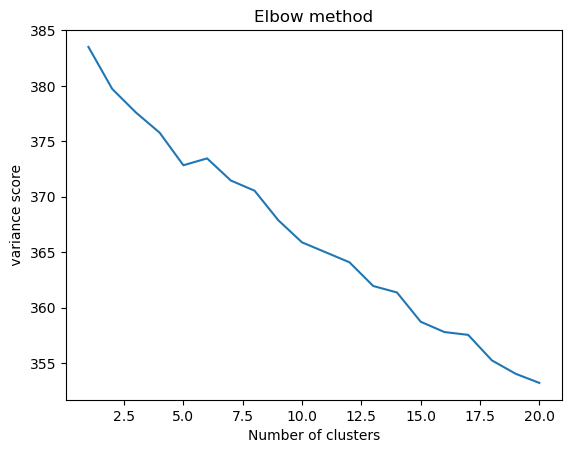

In [252]:
# Elbow method 
import matplotlib.pyplot as plt
plt.plot(range(1, max_clusters + 1), scores)
plt.xlabel('Number of clusters')
plt.ylabel(' variance score ')
plt.title('Elbow method')
plt.show()

## Application de K-Means avec 7 clusters

__Description__
: Application de l'algorithme K-Means avec 7 clusters sur la matrice TF-IDF des tweets lemmatisés, en utilisant l'initialisation k-means++ pour choisir les centres de manière plus efficace, et en fixant une graine pour la reproductibilité des résultats.

In [255]:
kmeansmodel = KMeans(n_clusters=7,init='k-means++', random_state = 42)
y_kmeans= kmeansmodel.fit_predict(X)

In [256]:
kmeansmodel

KMeans(n_clusters=7, random_state=42)

## Vérification des mots les plus fréquents dans les tweets lemmatisés

In [258]:
# Checking common words

freqX = pd.Series(' '.join(data['tweet_lemmatized']).split()).value_counts()[:25]

print('FREQ X: \n',freqX)

FREQ X: 
 world           3300
cup             3225
referee         2370
ref             2190
game             978
worldcup         943
match            462
penalty          457
fifaworldcup     409
argentina        398
england          380
time             374
get              331
team             330
var              322
final            310
messi            305
fifa             305
france           300
player           299
first            289
win              281
one              279
card             247
v                245
Name: count, dtype: int64


## Vérification des mots les plus rares dans les tweets lemmatisés

In [260]:
rareX = pd.Series(' '.join(data['tweet_lemmatized']).split()).value_counts()[-100:]
print('RARE X: \n',rareX)

RARE X: 
 andrewvossy    1
kangaroo       1
girlies        1
oooh           1
nagging        1
              ..
salah          1
promoting      1
feat           1
convenient     1
gyouys         1
Name: count, Length: 100, dtype: int64


## Transformation des tweets lemmatisés en features binaires

__Description__
: Cette commande utilise CountVectorizer pour transformer les tweets lemmatisés en une matrice binaire de termes, où chaque terme est marqué par sa présence (1) ou son absence (0) dans chaque tweet.

In [263]:
vectorizer = CountVectorizer(stop_words='english', binary=True)  # Binary to treat as set-like presence
binary_features = vectorizer.fit_transform(data.tweet_lemmatized)

## Calcul des distances de Jaccard entre les tweets

__Description__
: Transformation de matrice binaire en un tableau dense et calcule les distances de Jaccard pairwise entre les tweets

In [266]:
dense_matrix = binary_features.toarray()

# Compute pairwise Jaccard distances
from sklearn.metrics import pairwise_distances
jaccard_distance_matrix = pairwise_distances(dense_matrix, metric='jaccard')

C:\Users\ichig\anaconda3\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [267]:
kmeans=KMeans(n_clusters=7, random_state=42)
kmeans.fit(jaccard_distance_matrix)

KMeans(n_clusters=7, random_state=42)

In [268]:
tweets = data['Tweet'].tolist()
tweets

['The first female referee at a Men’s World Cup is from Philly. Tough 🔥',
 "North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. \n#WorldCup2022 #NorthKorea\n#Bracelet #FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup2022 #onelove",
 "If you're wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54)",
 'NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”\n\nWorld Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?”',
 "Possibly imagining it, but feel like there are fewer caustic player/referee in

## Obtention des centroïdes et des étiquettes de clusters

__Description__
: Cette commande extrait les centroïdes des clusters et assigne une étiquette de cluster à chaque tweet basé sur l'algorithme K-Means.

In [271]:
# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_
# Asignar etiquetas de cluster a cada tweet
cluster_labels = kmeans.labels_

cluster_labels

array([2, 6, 6, ..., 5, 6, 5])

## Affichage des tweets par cluster

__Description__
: Création d'un DataFrame pour associer chaque tweet à son cluster, puis affiche les tweets groupés par leur cluster respectif.

In [294]:

results = pd.DataFrame({'tweet': tweets,'cluster': cluster_labels})
for cluster in range(7):
    print(f"Cluster {cluster}:")
    cluster_users = results[results['cluster'] == cluster]
    print(cluster_users)

Cluster 0:
                                                  tweet  cluster
4     Possibly imagining it, but feel like there are...        0
15    Tyler Adams was the best player on the pitch t...        0
18    One of the worst referee jobs I've had the dis...        0
20    I know it's the oldest trope in the book, but ...        0
175   They must be using a timekeeper at this World ...        0
...                                                 ...      ...
3823  argentina doesn’t deserve it. they played so d...        0
3826  Pov: Thouran clearly gets fouled in the penalt...        0
3835  Today proved that Argentina can only win world...        0
3837  Iya yin! Infact Baba Iya yin! If I hear, it wa...        0
3862  Been notable for lots of things this game. Ref...        0

[876 rows x 2 columns]
Cluster 1:
                                                  tweet  cluster
204   #FIFAWorldCup\n#Canada played brilliantly till...        1
1243  with all this uproar about the world c

## Sélection des tweets représentatifs par proximité au centroïde

__Description__
: Cette commande utilise les distances euclidiennes pour trouver le tweet le plus proche du centroïde de chaque cluster et l'affiche comme tweet représentatif.

<Axes: xlabel='cluster', ylabel='count'>

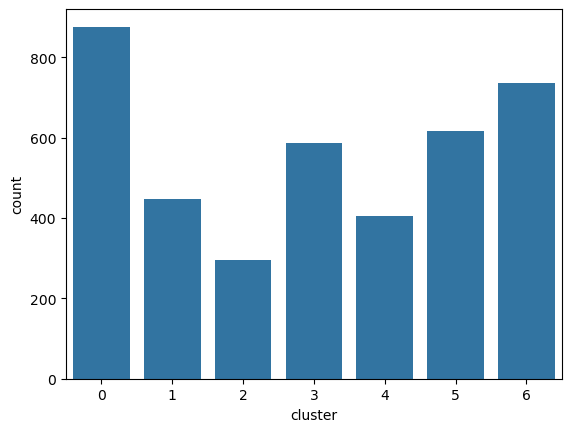

In [296]:
import seaborn as sns 
sns.countplot(data =results, x = 'cluster')

In [298]:
from sklearn.metrics import euclidean_distances

vectorized_tweets =jaccard_distance_matrix
# Choose representative tweets based on proximity to centroid
representative_tweets = []

for cluster in range(7):  # Assuming 7 clusters
    print(f"Cluster {cluster}:")
    
    # Get the indices of the tweets in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Get the vectors of the tweets in this cluster
    cluster_vectors = vectorized_tweets[cluster_indices]
    
    # Get the centroid of the current cluster
    centroid = centroids[cluster]
    
    # Calculate distances from each tweet to the centroid
    distances = euclidean_distances(cluster_vectors, centroid.reshape(1, -1))
    
    # Find the tweet with the minimum distance to the centroid
    closest_tweet_index = cluster_indices[np.argmin(distances)]
    
    # Get the tweet text from the closest tweet
    representative_tweet = tweets[closest_tweet_index]
    
    print(f"Representative Tweet: {representative_tweet}")
    representative_tweets.append(representative_tweet)

Cluster 0:
Representative Tweet: Someone — not sure if it was a ref or fan or who — on the St. John's/DePaul broadcast just yelled "he barely touched you, this ain't the World Cup" at Andre Curbelo
Cluster 1:
Representative Tweet: #ARGFRA #WC2022 Congrats to #POL for sending such an excellent referee to the WorldCup.
Cluster 2:
Representative Tweet: collect 6 packs of tayto and become a referee at the world cup
Cluster 3:
Representative Tweet: ref world cup gred liga malaysia ke
Cluster 4:
Representative Tweet: The irony of Son moaning at the ref for richarlison diving #BRAKOR #WorldCup
Cluster 5:
Representative Tweet: #banglafootball world cup dekhe indian referee der sekha uchit.
Cluster 6:
Representative Tweet: Each world cup referee ( y compris Salima Mukansanga ) will bag atleast $150K  , that's more than 150.000.000 rwfs / I'm only talking about central referees .


## Importation de la bibliothèque FCM pour le clustering flou


__Description__
: Importation de la classe FCM de la bibliothèque fcmeans, utilisée pour effectuer le clustering flou (Fuzzy C-Means).

In [301]:
from fcmeans import FCM 

## Transformation des tweets lemmatisés en une matrice TF-IDF

__Description__
: Cette commande transforme les tweets lemmatisés en une matrice TF-IDF, où chaque cellule représente l'importance d'un terme dans un document par rapport à l'ensemble des documents

In [304]:
vectorizer = TfidfVectorizer()  # Binary to treat as set-like presence
binary_features = vectorizer.fit_transform(data.tweet_lemmatized)
dense_matrix = binary_features.toarray()

## Analyse des métriques FPC et PEC pour le clustering flou

__Description__
: Cette commande calcule et trace les métriques FPC (Fuzzy Partition Coefficient) et PEC (Partition Entropy Coefficient) pour différents nombres de clusters (de 2 à 9), afin d'évaluer la qualité du clustering flou.

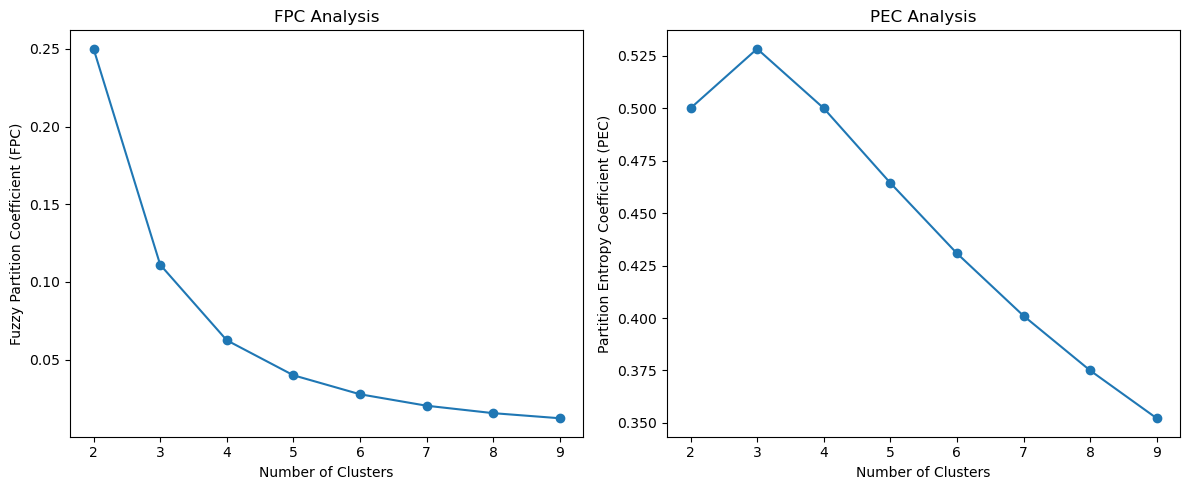

In [307]:
FPC = []
PEC = []

# Iterate over a range of clusters
for n_clusters in range(2, 10):
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(dense_matrix)  # Replace `data` with your dataset
    
    FPC.append(fcm.partition_coefficient)  # Use FPC
    PEC.append(fcm.partition_entropy_coefficient)  # Use PEC

# Plot the FPC and PEC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), FPC, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('FPC Analysis')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), PEC, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Partition Entropy Coefficient (PEC)')
plt.title('PEC Analysis')

plt.tight_layout()
plt.show()

## Application de Fuzzy C-Means et attribution des clusters


__Description__
: Cette commande applique Fuzzy C-Means avec 4 clusters et assigne chaque tweet au cluster ayant le degré d'appartenance maximal à partir de la matrice de membership.

In [310]:
# Step 2: Apply Fuzzy C-Means clustering
fcm = FCM(n_clusters=4, m=2)  # m=2 is a common choice for the fuzziness factor
fcm.fit(dense_matrix)

# Get the degree of membership (membership matrix)
membership = fcm.u

# Step 3: Assign each tweet to a cluster
cluster_labels = np.argmax(membership, axis=1)

## Sélection des tweets représentatifs pour chaque cluster


__Description__
: Sélection des tweets représentatifs pour chaque cluster en identifiant celui qui a le degré d'appartenance maximal dans la matrice de membership.


In [313]:

# Step 4: Choose representative tweets based on maximum membership
representative_tweets = []

for cluster in range(4):  # Assuming 4 clusters, adjust if necessary
    # Get the indices of tweets in the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Get the membership values for the cluster
    cluster_membership = membership[cluster_indices, cluster]
    
    # Find the tweet with the highest membership to the cluster
    closest_tweet_index = cluster_indices[np.argmax(cluster_membership)]
    
    # Get the tweet text from the closest tweet
    representative_tweet = tweets[closest_tweet_index]
    
    print(f"Cluster {cluster}:")
    print(f"Representative Tweet: {representative_tweet}")
    representative_tweets.append(representative_tweet)

Cluster 0:
Representative Tweet: How is this ref at a World Cup 😭😭😭
Cluster 1:
Representative Tweet: An all-female refereeing team will take charge of a men’s World Cup game for the first time in Thursday’s group-stage game between Costa Rica and Germany.
Stephanie Frappart will be the first woman to referee at a men’s World Cup.
Cluster 2:
Representative Tweet: Just give this fucking shit to Messi already cus what is this?!! Penalty for Argentina in every match!! Player collided into goalkeeper, VAR not even checked, and straight penalty. Fuck FIFA, fuck the ref!! Fuck this World Cup!!
Cluster 3:
Representative Tweet: Referee😂 #WorldCup
